In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics

In [140]:
df = pd.read_csv('data_new.csv')
df.head()

,Unnamed: 0,index,Name,Age,Wage,Skill Moves,Height(cm),Weight(kg),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,High,Medium,Low
0,0,0,L. Messi,31,5655655655655655750719146973811473841995962705...,4.0,170.18,72.1224,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0,1,0
1,1,1,Cristiano Ronaldo,33,4054054054054053839535635362424668570906589246...,5.0,187.96,83.0088,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,0,1
2,2,2,Neymar Jr,26,2902902902902902608465004735154428321102300262...,5.0,175.26,68.0400,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1,0
3,3,3,De Gea,27,2602602602602602698266011101606341311831094188...,1.0,193.04,76.2048,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,0,1,0
4,4,4,K. De Bruyne,27,3553553553553554097845898044350448156438349173...,4.0,180.34,69.8544,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,0,0


In [0]:
Crossing_GK = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

In [142]:
df['sum'] = df[Crossing_GK].sum(axis = 1)
df['avg'] = df[Crossing_GK].mean(axis = 1)
total_avg = df['avg'].mean()
df.head()

,Unnamed: 0,index,Name,Age,Wage,Skill Moves,Height(cm),Weight(kg),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,High,Medium,Low,sum,avg
0,0,0,L. Messi,31,5655655655655655750719146973811473841995962705...,4.0,170.18,72.1224,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0,1,0,2298.0,67.588235
1,1,1,Cristiano Ronaldo,33,4054054054054053839535635362424668570906589246...,5.0,187.96,83.0088,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,0,1,2323.0,68.323529
2,2,2,Neymar Jr,26,2902902902902902608465004735154428321102300262...,5.0,175.26,68.0400,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1,0,2237.0,65.794118
3,3,3,De Gea,27,2602602602602602698266011101606341311831094188...,1.0,193.04,76.2048,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,0,1,0,1539.0,45.264706
4,4,4,K. De Bruyne,27,3553553553553554097845898044350448156438349173...,4.0,180.34,69.8544,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,0,0,2369.0,69.676471


In [143]:
print(total_avg)

48.723783053614476


In [144]:
df['score'] = df['avg'].apply(lambda x : 'Above-average Players' if x > total_avg else 'Below-averge Players')
df.head()

,Unnamed: 0,index,Name,Age,Wage,Skill Moves,Height(cm),Weight(kg),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,High,Medium,Low,sum,avg,score
0,0,0,L. Messi,31,5655655655655655750719146973811473841995962705...,4.0,170.18,72.1224,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0,1,0,2298.0,67.588235,Above-average Players
1,1,1,Cristiano Ronaldo,33,4054054054054053839535635362424668570906589246...,5.0,187.96,83.0088,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,0,1,2323.0,68.323529,Above-average Players
2,2,2,Neymar Jr,26,2902902902902902608465004735154428321102300262...,5.0,175.26,68.0400,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1,0,2237.0,65.794118,Above-average Players
3,3,3,De Gea,27,2602602602602602698266011101606341311831094188...,1.0,193.04,76.2048,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,0,1,0,1539.0,45.264706,Below-averge Players
4,4,4,K. De Bruyne,27,3553553553553554097845898044350448156438349173...,4.0,180.34,69.8544,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,0,0,2369.0,69.676471,Above-average Players


In [0]:
#切分input, output
x = df.loc[:,['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]
y = df.loc[:,['score']]

In [0]:
from sklearn import preprocessing

#將score轉為數字label
le = preprocessing.LabelEncoder()
y_class_label=le.fit_transform(y['score'])

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_class_label, test_size=0.33)

## 先來一個資料的視覺化
第一個scatter圖是分析由Height和HeadingAccuracy這兩項分數來分析好球員與壞球員
<br>可以看出HeadingAccuracy比較高的大部分是紫色，也就是總成績較高的好球員。

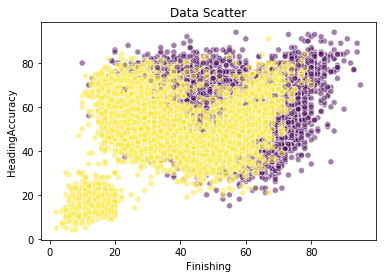

In [148]:
import matplotlib
import matplotlib.pyplot as plt

plt.title('Data Scatter')     
plt.xlabel('Finishing')                   
plt.ylabel('HeadingAccuracy')          

plt.scatter(df['Finishing'], df['HeadingAccuracy'], c = y_class_label, alpha = 0.5, edgecolor= 'w')  

plt.show()

## Naive Bayers
若用原本的dataset，準確度會只有0.85，因此重新選一組來用
<br>不選與GK相關的值，GK是跟守門員有關的分數，
<br>如果算進去會對大多數球員的分數有拉低的作用，因此不考慮

In [0]:
nb_x_train = x_train.loc[:,['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']]
nb_x_test = x_test.loc[:,['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']]

In [150]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(nb_x_train, y_train)
nb_pred = nb_model.predict(nb_x_test)
print('accuracy :', nb_model.score(nb_x_test, y_test))
print("Naive Bayes Classification Report:")
print(metrics.classification_report(y_test, nb_pred))

accuracy : 0.9165693308860337
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3327
           1       0.96      0.85      0.90      2666

    accuracy                           0.92      5993
   macro avg       0.92      0.91      0.91      5993
weighted avg       0.92      0.92      0.92      5993



In [151]:
from sklearn import metrics
print("Naive Bayes Confusion Matrix")
print(metrics.confusion_matrix(y_test, nb_pred))

Naive Bayes Confusion Matrix
[[3239   88]
 [ 412 2254]]


## Naive Bayes Scatter 視覺化


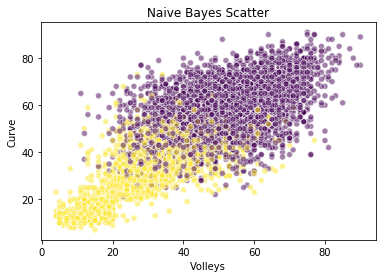

In [152]:
plt.title('Naive Bayes Scatter')     
plt.xlabel('Volleys')                   
plt.ylabel('Curve')          


plt.scatter(nb_x_test['Volleys'], nb_x_test['Curve'], c = nb_model.predict(nb_x_test), alpha = 0.5, edgecolor= 'w')  

plt.show()

## Decision Tree

In [153]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(criterion = 'gini',max_depth=20,max_leaf_nodes = 33)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
print('accuracy :', dt_model.score(x_test, y_test))
print("Decision Tree Classification Report:")
print(metrics.classification_report(y_test, dt_pred))

accuracy : 0.9023861171366594
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3327
           1       0.90      0.88      0.89      2666

    accuracy                           0.90      5993
   macro avg       0.90      0.90      0.90      5993
weighted avg       0.90      0.90      0.90      5993



In [154]:
print("Decision Tree Confusion Matrix")
print(metrics.confusion_matrix(y_test, dt_pred))

Decision Tree Confusion Matrix
[[3051  276]
 [ 309 2357]]


## Decision Tree視覺化

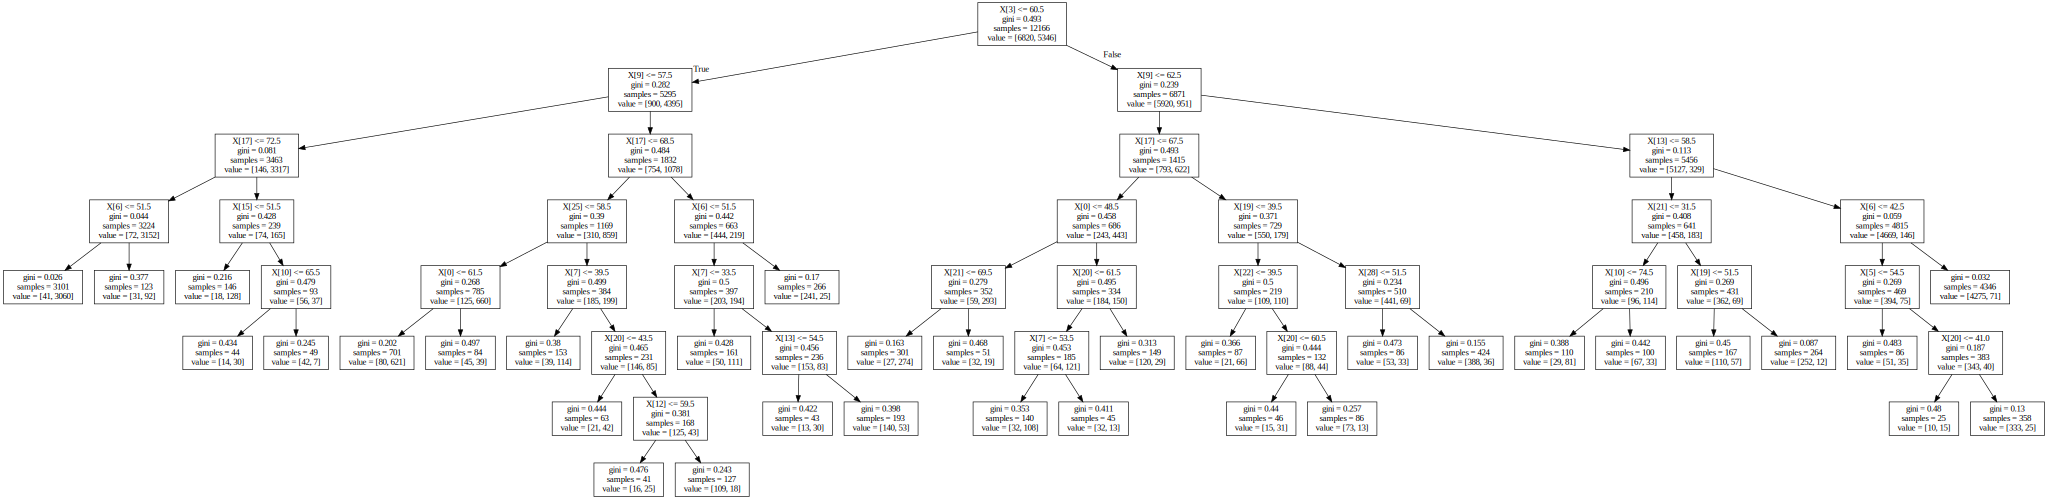

In [155]:
import graphviz

dot_data = tree.export_graphviz(dt_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("decision_tree")
graph

## Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression as LR
lr_model = LR(solver = 'liblinear').fit(x_train , y_train)
lr_pred = lr_model.predict(x_test)
print('accuracy :', lr_model.score(x_test, y_test))

print("Logistic Regression Classification Report:")
print(metrics.classification_report(y_test, lr_pred))

accuracy : 0.9686300684131487
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3327
           1       0.97      0.96      0.96      2666

    accuracy                           0.97      5993
   macro avg       0.97      0.97      0.97      5993
weighted avg       0.97      0.97      0.97      5993



In [157]:
print("Logistic Regression Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_pred))

Logistic Regression Confusion Matrix
[[3250   77]
 [ 111 2555]]


## Logistic Regression Scatter 視覺化


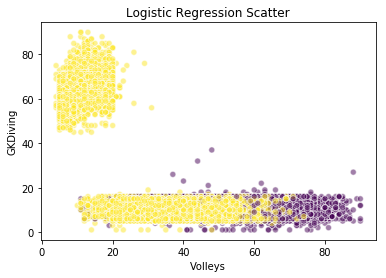

In [158]:
plt.title('Logistic Regression Scatter')     
plt.xlabel('Volleys')                   
plt.ylabel('GKDiving')          

plt.scatter(x['Volleys'], x['GKDiving'], c = lr_model.predict(x), alpha = 0.5, edgecolor= 'w')  

plt.show()

## SVM

In [0]:
scaler = preprocessing.StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [160]:
from sklearn.svm import SVC  
svm_model = SVC(kernel='linear')  
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test) 
print('accuracy :', svm_model.score(x_test, y_test))

accuracy : 0.9986651092941765


In [161]:
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3327
           1       1.00      1.00      1.00      2666

    accuracy                           1.00      5993
   macro avg       1.00      1.00      1.00      5993
weighted avg       1.00      1.00      1.00      5993



In [162]:
print("SVM Confusion Matrix")
print(confusion_matrix(y_test,y_pred)) 

SVM Confusion Matrix
[[3324    3]
 [   5 2661]]


## SVM視覺化

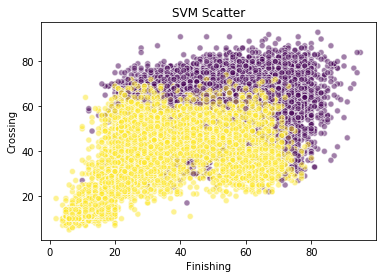

In [163]:
plt.title('SVM Scatter')     
plt.xlabel('Finishing')                   
plt.ylabel('Crossing')          

plt.scatter(x['Finishing'], x['Crossing'], c = svm_model.predict(x), alpha = 0.5, edgecolor= 'w')  

plt.show()

## KNN

In [164]:
from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(n_neighbors=6)
knn_model.fit(x)
get_x = x.iloc[0:3,:]
neighbors = knn_model.kneighbors(get_x, return_distance=False) 
neighbors = neighbors.tolist()
print(neighbors)

[[0, 2, 15, 5, 154, 23], [1, 23, 10, 25, 33, 122], [2, 5, 0, 15, 157, 154]]


In [165]:
#Neymar
for i in range(len(neighbors[2])):
    player_id = neighbors[2][i]
    print(df.iloc[player_id, 2])
print()    
#Messi
for i in range(len(neighbors[0])):
    player_id = neighbors[0][i]
    print(df.iloc[player_id, 2])

Neymar Jr
E. Hazard
L. Messi
P. Dybala
Ronaldo Cabrais
A. Robben

L. Messi
Neymar Jr
P. Dybala
E. Hazard
A. Robben
S. Agüero


In [166]:
from sklearn.neighbors import KNeighborsClassifier as KNN
KNN_model = KNN(n_neighbors = 6)
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test) 
print('accuracy :', KNN_model.score(x_test, y_test))

print(classification_report(y_test,y_pred))  

accuracy : 0.9627899215751711
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3327
           1       0.98      0.94      0.96      2666

    accuracy                           0.96      5993
   macro avg       0.97      0.96      0.96      5993
weighted avg       0.96      0.96      0.96      5993



In [167]:
print("KNN Confusion Matrix")
print(metrics.confusion_matrix(y_test,y_pred)) 

KNN Confusion Matrix
[[3276   51]
 [ 172 2494]]


## KNN視覺化

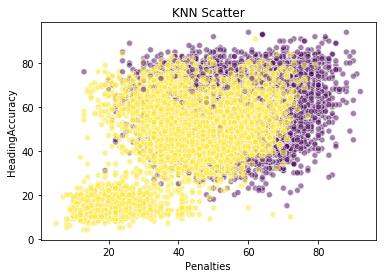

In [168]:
plt.title('KNN Scatter')     
plt.xlabel('Penalties')                   
plt.ylabel('HeadingAccuracy')          

plt.scatter(x['Penalties'], x['HeadingAccuracy'], c = KNN_model.predict(x), alpha = 0.5, edgecolor= 'w')  

plt.show()

## (加分題) Ensemble Learning
利用三種方法進行10 Folds cross-validation

In [0]:
from sklearn.model_selection import cross_val_score

## BaggingClassifier

In [183]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

dt_bag_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=10)
results = model_selection.cross_val_score(dt_bag_model, nb_x_train, y_train, cv = 10)
print('accuracy :',results.mean())

accuracy : 0.9415596754313886


## RandomForestClassifier

In [184]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 10, max_features = 3)
results = model_selection.cross_val_score(RF_model, nb_x_train, y_train, cv = 10)
print('accuracy :',results.mean())

accuracy : 0.9448474597803054


## AdaBoost

In [185]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 80, learning_rate=1, random_state = 5)
results = model_selection.cross_val_score(adb, x_train, y_train, cv = 10)
print('accuracy :',results.mean())

accuracy : 0.9104054945292566
